# Piramide poblacional por sector

Grafico comparativo por sector usando las categorias de edad solicitadas.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

ruta_excel = "data/parroquiasDesglose.xlsx"


In [3]:
df = pd.read_excel(ruta_excel)
df.columns = df.columns.str.strip()

def normalizar(texto):
    texto = texto.strip().lower()
    reemplazos = {
        "á": "a",
        "é": "e",
        "í": "i",
        "ó": "o",
        "ú": "u",
        "ñ": "n",
    }
    for k, v in reemplazos.items():
        texto = texto.replace(k, v)
    texto = texto.replace("anos", "anos").replace("mas", "mas")
    return texto

mapa_columnas = {normalizar(c): c for c in df.columns}

categorias_edad = [
    "De 0 a 4 años",
    "De 5 a 9 años",
    "De 10 a 14 años",
    "De 15 a 19 años",
    "De 20 a 24 años",
    "De 25 a 29 años",
    "De 30 a 34 años",
    "De 35 a 39 años",
    "De 40 a 44 años",
    "De 45 a 49 años",
    "De 50 a 54 años",
    "De 55 a 59 años",
    "De 60 a 64 años",
    "De 65 a 69 años",
    "De 70 a 74 años",
    "De 75 a 79 años",
    "De 80 a 84 años",
    "De 85 o mas",
]

columnas_edad = []
faltantes = []
for c in categorias_edad:
    clave = normalizar(c)
    if clave in mapa_columnas:
        columnas_edad.append(mapa_columnas[clave])
    else:
        faltantes.append(c)

if faltantes:
    raise ValueError(f"No se encontraron estas columnas de edad en el Excel: {faltantes}")

df[columnas_edad] = df[columnas_edad].fillna(0)
df.head()


,Provincia,Cantón,Parroquia,Código_Parroq,SECTOR,Hombre,Mujer,Total,Menor de 1 año,De 1 a 4 años,...,De 65 a 69 años,De 70 a 74 años,De 75 a 79 años,De 80 a 84 años,De 85 o mas,De 85 a 89 años,De 90 a 94 años,De 95 a 99 años,De 100 años o más,Total.1
0,Pichincha,Distrito Metropolitano de Quito,Alangasí,170151.0,VALLE1,16611.0,18044.0,34655.0,304.0,1510.0,...,1323.0,934.0,627.0,461.0,474.0,267.0,158.0,36,13,34655.0
1,Pichincha,Distrito Metropolitano de Quito,Amaguaña,170152.0,VALLE1,21118.0,22117.0,43235.0,509.0,2248.0,...,1212.0,761.0,657.0,473.0,443.0,251.0,145.0,45,2,43235.0
2,Pichincha,Distrito Metropolitano de Quito,Atahualpa,170153.0,RURAL,689.0,757.0,1446.0,13.0,55.0,...,93.0,58.0,54.0,46.0,41.0,31.0,10.0,-,-,1446.0
3,Pichincha,Distrito Metropolitano de Quito,Belisario Quevedo,170101.0,NORTE,23862.0,26638.0,50500.0,422.0,1923.0,...,2017.0,1588.0,1022.0,726.0,844.0,451.0,300.0,79,14,50500.0
4,Pichincha,Distrito Metropolitano de Quito,Calacalí,170154.0,RURAL,2407.0,2557.0,4964.0,54.0,257.0,...,158.0,123.0,107.0,85.0,84.0,48.0,29.0,6,1,4964.0


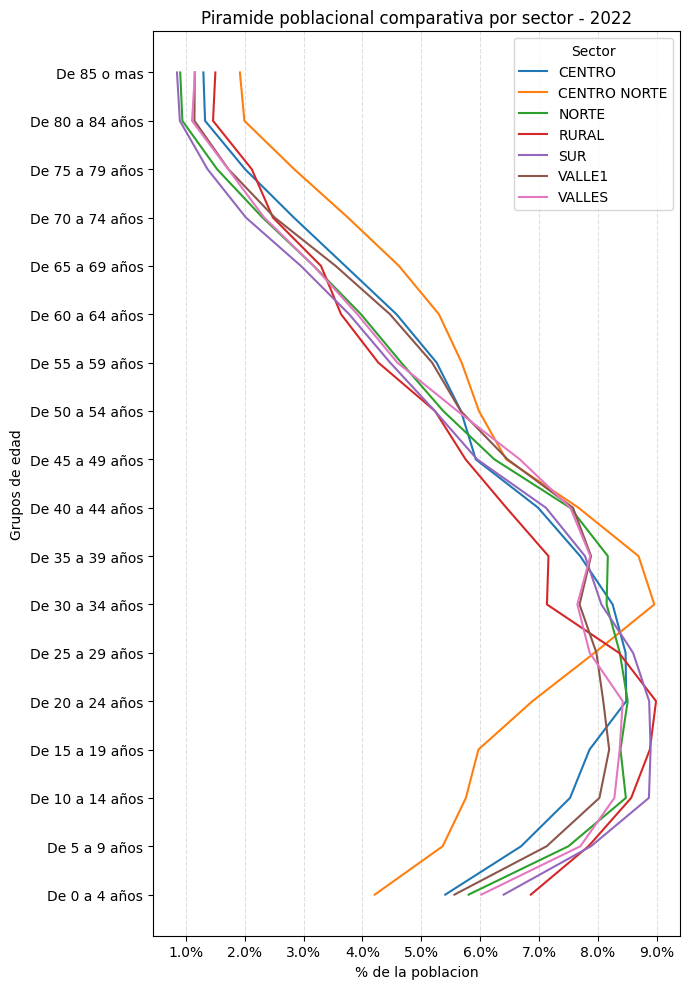

In [4]:
sector_edad = df.groupby("SECTOR")[columnas_edad].sum()
sector_edad_pct = sector_edad.div(sector_edad.sum(axis=1), axis=0)

etiquetas_edad = categorias_edad
posiciones = list(range(len(etiquetas_edad)))

fig, ax = plt.subplots(figsize=(7, 10))

for sector in sector_edad_pct.index:
    valores = sector_edad_pct.loc[sector, columnas_edad].values
    ax.plot(valores, posiciones, label=sector)

ax.set_yticks(posiciones)
ax.set_yticklabels(etiquetas_edad)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlabel("% de la poblacion")
ax.set_ylabel("Grupos de edad")
ax.set_title("Piramide poblacional comparativa por sector - 2022")
ax.grid(axis="x", linestyle="--", alpha=0.4)
ax.legend(title="Sector")

plt.tight_layout()
plt.show()


In [5]:
# Agrupa VALLE1 y VALLES en un solo sector llamado Valles
sector_edad_agr = sector_edad.copy()
sector_edad_agr.index = sector_edad_agr.index.to_series().replace({"VALLE1": "Valles", "VALLES": "Valles"})
sector_edad_agr = sector_edad_agr.groupby(sector_edad_agr.index).sum()
sector_edad_pct_agr = sector_edad_agr.div(sector_edad_agr.sum(axis=1), axis=0)


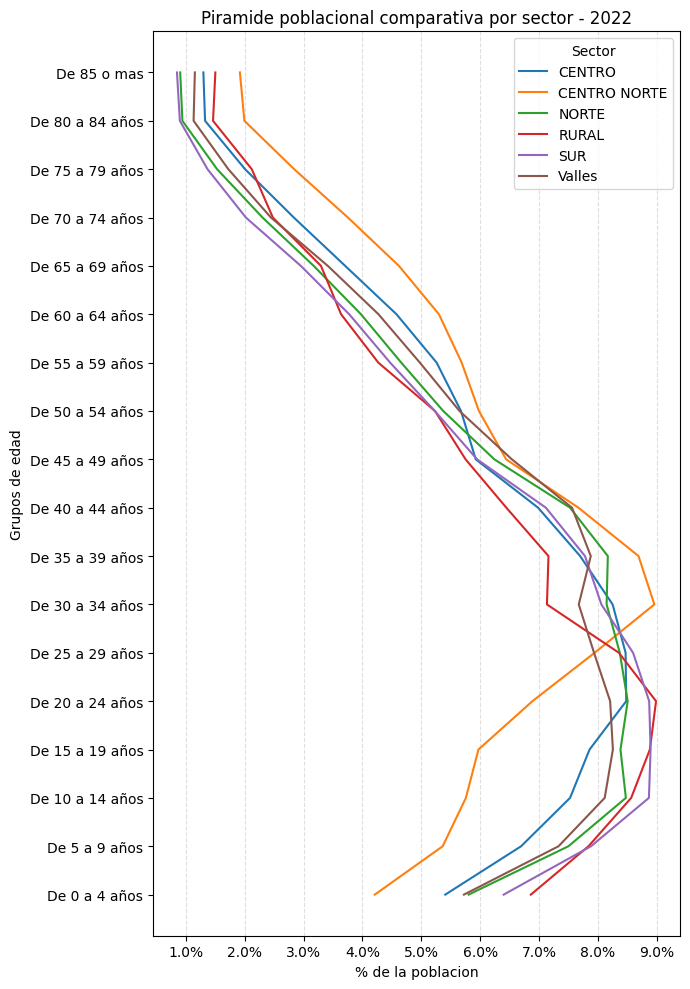

In [6]:
# Grafico con sectores agrupados
fig, ax = plt.subplots(figsize=(7, 10))

for sector in sector_edad_pct_agr.index:
    valores = sector_edad_pct_agr.loc[sector, columnas_edad].values
    ax.plot(valores, posiciones, label=sector)

ax.set_yticks(posiciones)
ax.set_yticklabels(etiquetas_edad)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlabel("% de la poblacion")
ax.set_ylabel("Grupos de edad")
ax.set_title("Piramide poblacional comparativa por sector - 2022")
ax.grid(axis="x", linestyle="--", alpha=0.4)
ax.legend(title="Sector")

plt.tight_layout()
plt.show()


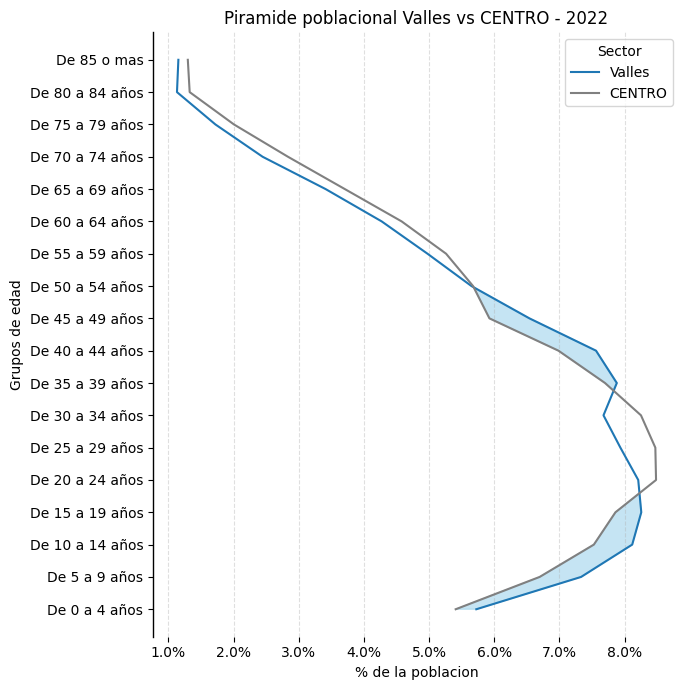

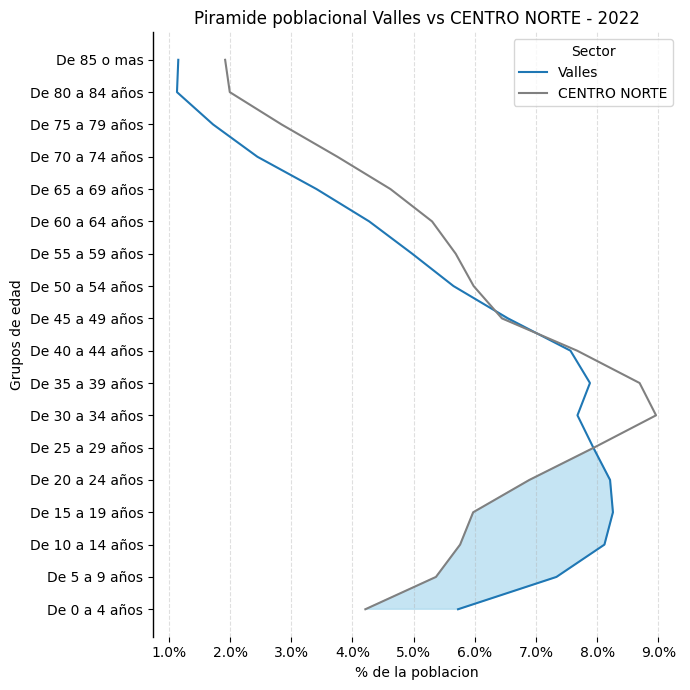

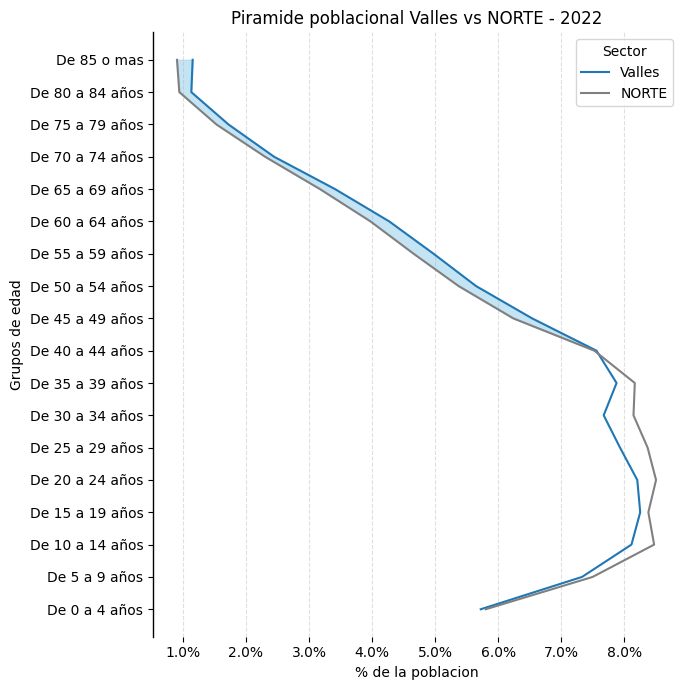

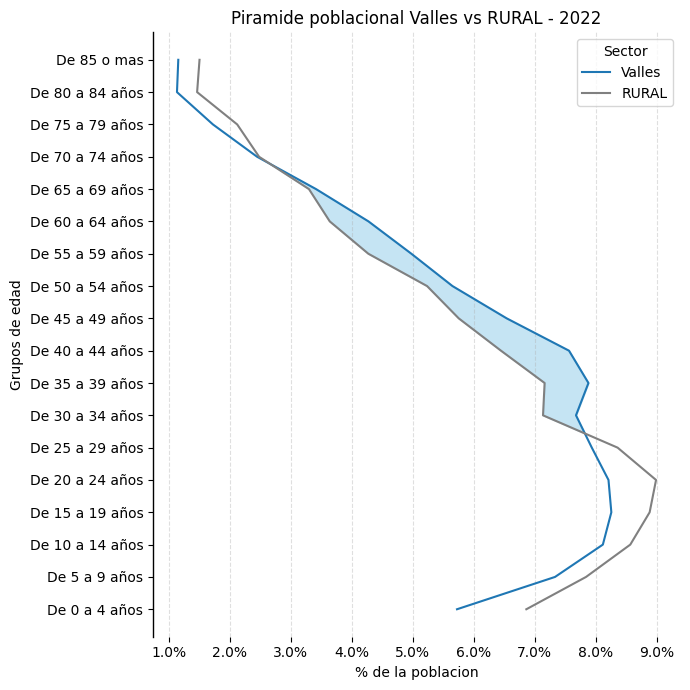

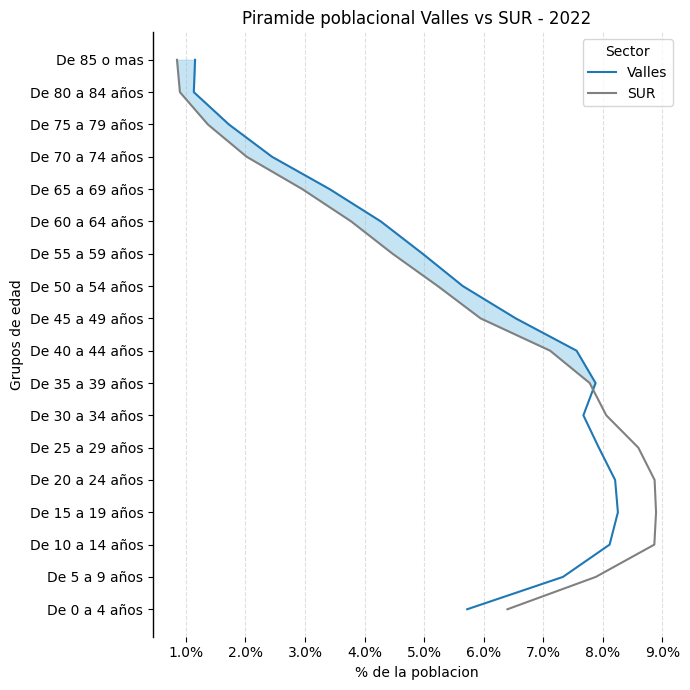

In [11]:
# Grafico Valles vs cada sector (uno por sector)
for sector in sector_edad_agr.index:
    if sector == "Valles":
        continue
    subset = sector_edad_agr.loc[["Valles", sector]]
    subset_pct = subset.div(subset.sum(axis=1), axis=0)

    fig, ax = plt.subplots(figsize=(7, 7))
    valles_vals = subset_pct.loc["Valles", columnas_edad].values
    other_vals = subset_pct.loc[sector, columnas_edad].values

    ax.plot(valles_vals, posiciones, label="Valles")
    ax.plot(other_vals, posiciones, label=sector, color='#808080')
    ax.fill_betweenx(posiciones, valles_vals, other_vals, where=(valles_vals > other_vals), interpolate=True, color="#9fd3eb", alpha=0.6)

    ax.set_yticks(posiciones)
    ax.set_yticklabels(etiquetas_edad)

    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.set_xlabel("% de la poblacion")
    ax.set_ylabel("Grupos de edad")
    ax.set_title(f"Piramide poblacional Valles vs {sector} - 2022")
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.grid(axis="x", linestyle="--", alpha=0.4)
    ax.legend(title="Sector")

    plt.tight_layout()
    plt.show()
